In [1027]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq
from scipy import signal

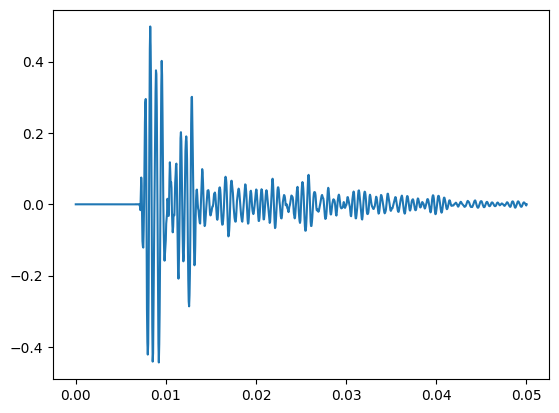

In [1028]:
path = 'metronome.wav'
metronome_window =200
audio, sample_rate = librosa.load(path,duration=0.05,offset=0.06)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

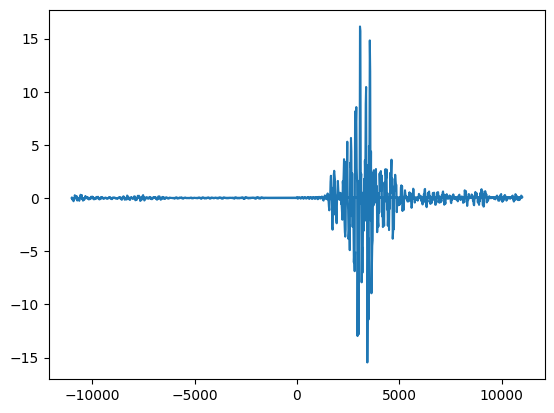

In [1029]:
audio_fft = rfft(audio)
sample_period = 1/sample_rate
W=fftfreq(audio.size,sample_period)
plt.plot(W,audio_fft)
plt.show

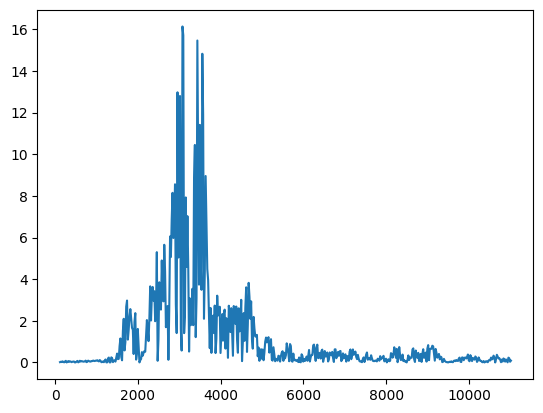

In [1030]:
#plt.plot(W[(W>1800)&(W<2000)],abs(audio_fft[(W>1800)&(W<2000)]))
plt.plot(W[(W>100)&(W<12000)],abs(audio_fft[(W>100)&(W<12000)]))

In [1031]:
def fft(audio, sample_rate):
    audio_fft = rfft(audio)
    W = rfftfreq(audio.size,1/sample_rate)
    return audio_fft, W


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=fftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if audio_fft[i] > average:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i] > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i] > fig_a[-1]:
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W,audio_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(1619.1749773345423, 2019.1749773345423),
 (2878.603807796918, 3278.603807796918),
 (3358.386219401632, 3758.386219401632),
 (3658.2502266545785, 4058.2502266545785),
 (3898.141432456936, 4298.141432456936),
 (4118.04170444243, 4518.04170444243),
 (4417.905711695376, 4817.905711695376),
 (4637.805983680871, 5037.805983680871),
 (4897.688123300091, 5297.688123300091),
 (5477.425203989121, 5877.425203989121),
 (6057.162284678151, 6457.162284678151),
 (6936.7633726201275, 7336.7633726201275),
 (7996.282864913872, 8396.282864913872),
 (8516.047144152313, 8916.047144152313),
 (8815.911151405258, 9215.911151405258)]

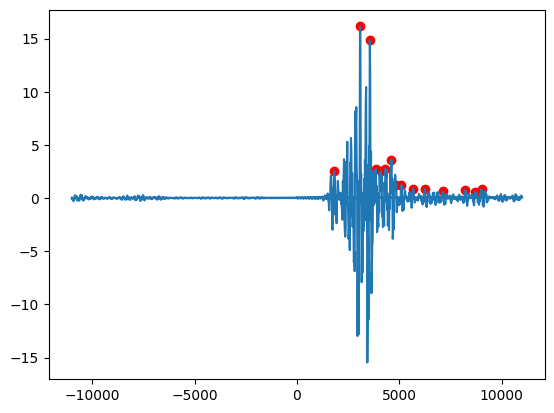

In [1032]:
audio_fft, W = fft(audio,sample_rate)
ranges = get_ranges(audio_fft, W,sample_rate,metronome_window)
ranges

In [1033]:
print(ranges)
def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,window*2,len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(20*han/20) 

    cosom_de = cuttoff.copy()
    print(sum(abs(audio_fft))-sum(abs(cuttoff)))
    
    return cuttoff


[(1619.1749773345423, 2019.1749773345423), (2878.603807796918, 3278.603807796918), (3358.386219401632, 3758.386219401632), (3658.2502266545785, 4058.2502266545785), (3898.141432456936, 4298.141432456936), (4118.04170444243, 4518.04170444243), (4417.905711695376, 4817.905711695376), (4637.805983680871, 5037.805983680871), (4897.688123300091, 5297.688123300091), (5477.425203989121, 5877.425203989121), (6057.162284678151, 6457.162284678151), (6936.7633726201275, 7336.7633726201275), (7996.282864913872, 8396.282864913872), (8516.047144152313, 8916.047144152313), (8815.911151405258, 9215.911151405258)]


In [1034]:

audio_final = irfft(remove_ranges(audio_fft, W, ranges,metronome_window))
Audio(audio_final, rate = sample_rate)

-1094.4821018521907


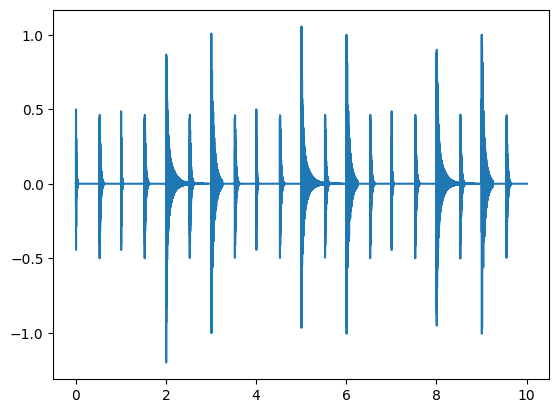

In [1035]:
path = 'allmixed.wav'
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)


In [1036]:

audio_fft, W = fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,metronome_window))
Audio(audio_final, rate = sample_rate)

-2309998.2846125886


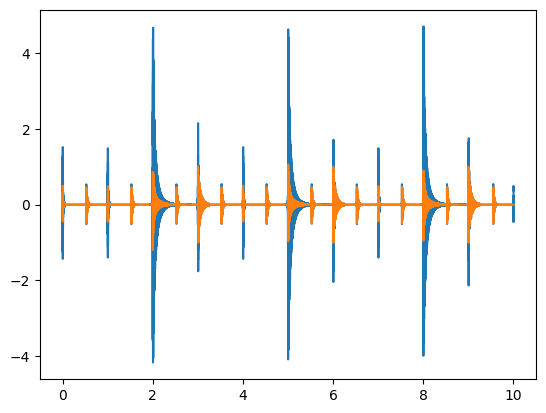

In [1037]:

plt.plot(time,audio_final)
plt.plot(time,audio)

In [1038]:
audio_test, sample_rate = librosa.load(path,duration=0.05,offset=0.0665)

r = np.arange(1,1000,10)
res = list()
winner = list()
audio_fft, W = fft(audio_test,sample_rate)

time = np.linspace(0,(1/sample_rate)*len(audio_test),len(audio_test))
for i in r:
    metronome_window =i
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,metronome_window*2,len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-50*han/20) 
    res.append(sum(abs(audio_fft)-abs(cuttoff)))



In [1039]:
max = min(res)
win = 0
for i in range(len(res)):
    if res[i] > mn:
        mn = res[i]
        win=i

-1103.7534082365455


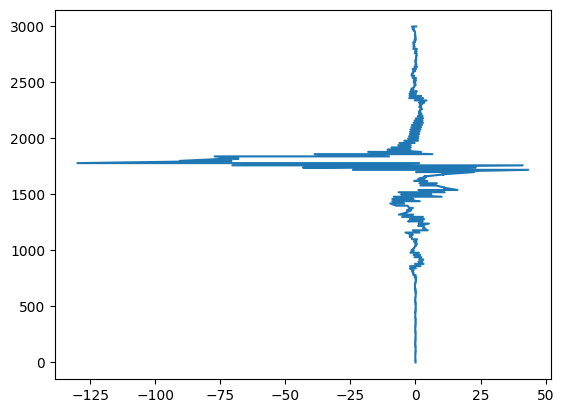

In [1040]:
path = 'metronome.wav'
metronome_window =400
audio, sample_rate = librosa.load(path,duration=0.05,offset=0.0665)
audio_fft, W = fft(audio,sample_rate)
cuttoff= remove_ranges(audio_fft, W, ranges,metronome_window)
audio_final = irfft(cuttoff)
filt = (W<3000)
plt.plot(cuttoff[filt],W[filt])

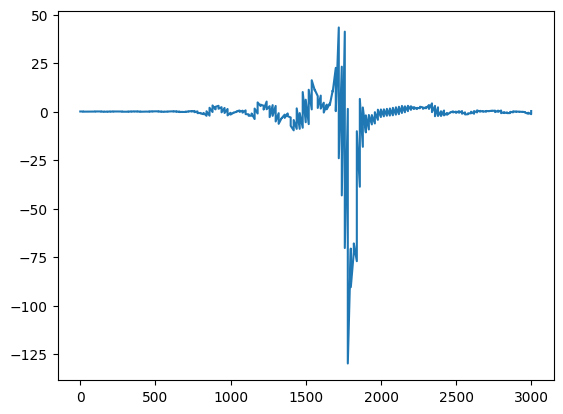

In [1041]:
plt.plot(W[filt],cuttoff[filt])

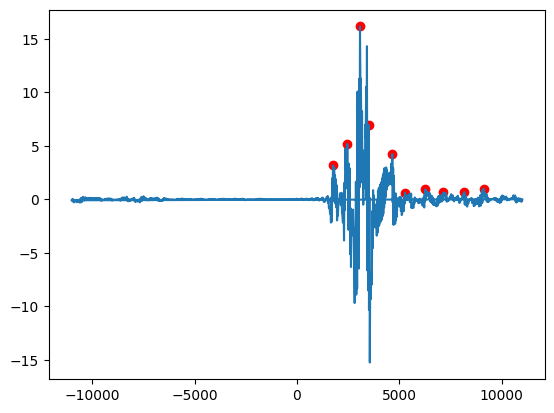

In [1042]:
ranges2 = get_ranges(audio_fft, W, sample_rate, 400)

In [1043]:
for r in ranges2:
    ranges.append(r)
ranges

[(1619.1749773345423, 2019.1749773345423),
 (2878.603807796918, 3278.603807796918),
 (3358.386219401632, 3758.386219401632),
 (3658.2502266545785, 4058.2502266545785),
 (3898.141432456936, 4298.141432456936),
 (4118.04170444243, 4518.04170444243),
 (4417.905711695376, 4817.905711695376),
 (4637.805983680871, 5037.805983680871),
 (4897.688123300091, 5297.688123300091),
 (5477.425203989121, 5877.425203989121),
 (6057.162284678151, 6457.162284678151),
 (6936.7633726201275, 7336.7633726201275),
 (7996.282864913872, 8396.282864913872),
 (8516.047144152313, 8916.047144152313),
 (8815.911151405258, 9215.911151405258),
 (1359.202175883953, 2159.202175883953),
 (2058.8848594741617, 2858.8848594741617),
 (2678.603807796918, 3478.603807796918),
 (3098.413417951043, 3898.413417951043),
 (4257.887579329103, 5057.887579329103),
 (4877.606527651858, 5677.606527651858),
 (5877.153218495014, 6677.153218495014),
 (6756.75430643699, 7556.75430643699),
 (7776.291931097008, 8576.291931097008),
 (8715.86582

In [1044]:
path = 'metronome.wav'
metronome_window =400
audio, sample_rate = librosa.load(path,duration=0.05,offset=0.0665)
audio_fft, W = fft(audio,sample_rate)
cuttoff= remove_ranges(audio_fft, W, ranges,metronome_window)
audio_final = irfft(cuttoff)
Audio(audio_final, rate = sample_rate)

-10755.004294000973


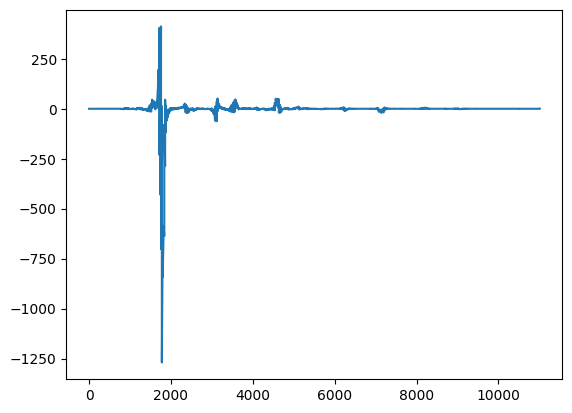

In [1045]:
plt.plot(W,cuttoff)

In [1046]:
path = 'allmixed.wav'
metronome_window =400
audio, sample_rate = librosa.load(path)
audio_fft, W = fft(audio,sample_rate)
cuttoff= remove_ranges(audio_fft, W, ranges,metronome_window)
audio_final = irfft(cuttoff)
Audio(audio_final, rate = sample_rate)

-17116877.871951386


In [1007]:
Audio(audio, rate = sample_rate)